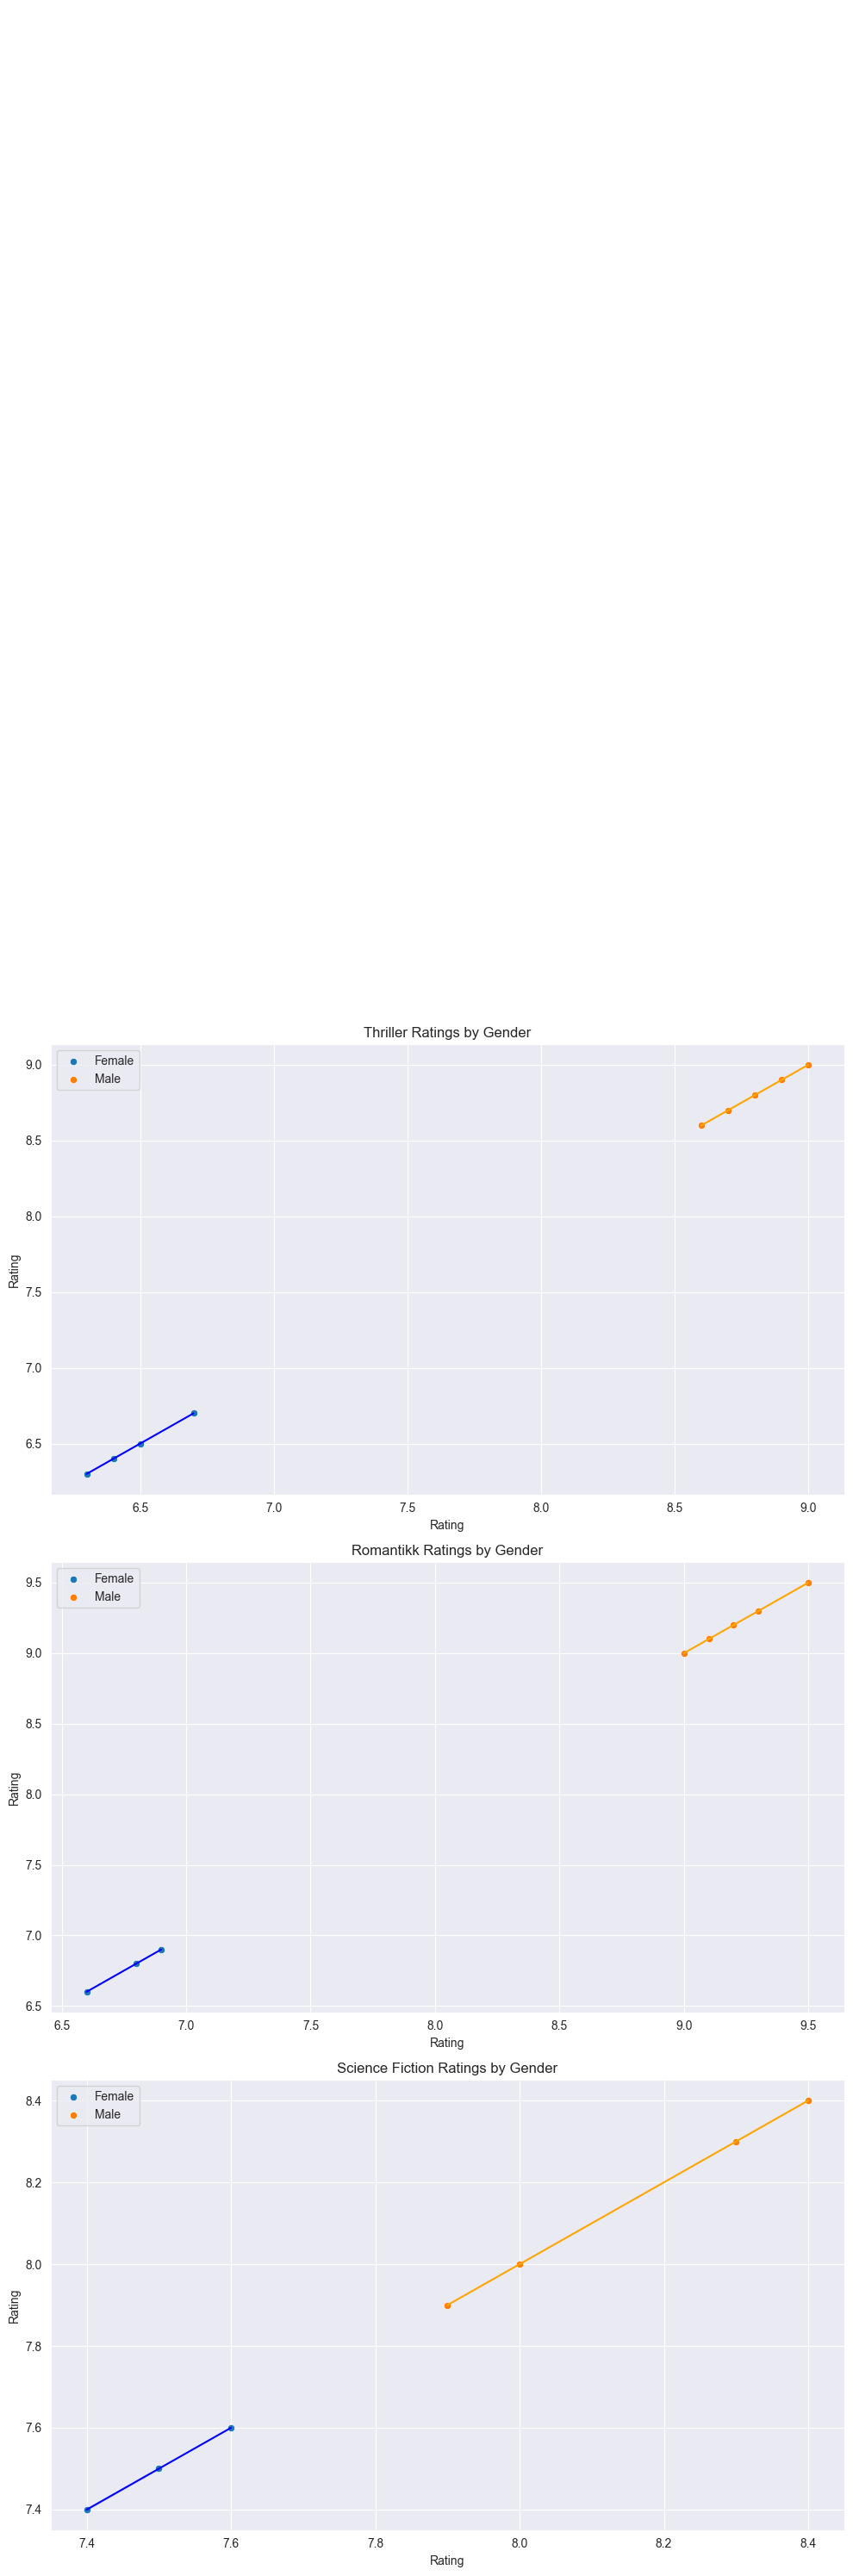

C:\Users\chris\AppData\Local\Temp\ipykernel_21372\4262086595.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['word_count'] = female_data['review_comment'].apply(lambda x: len(x.split()))
C:\Users\chris\AppData\Local\Temp\ipykernel_21372\4262086595.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['word_count'] = male_data['review_comment'].apply(lambda x: len(x.split()))
C:\Users\chris\AppData\Local\Temp\ipykernel_21372\4262086595.py:25: SettingWithCopyWarning: 
A value is tryi

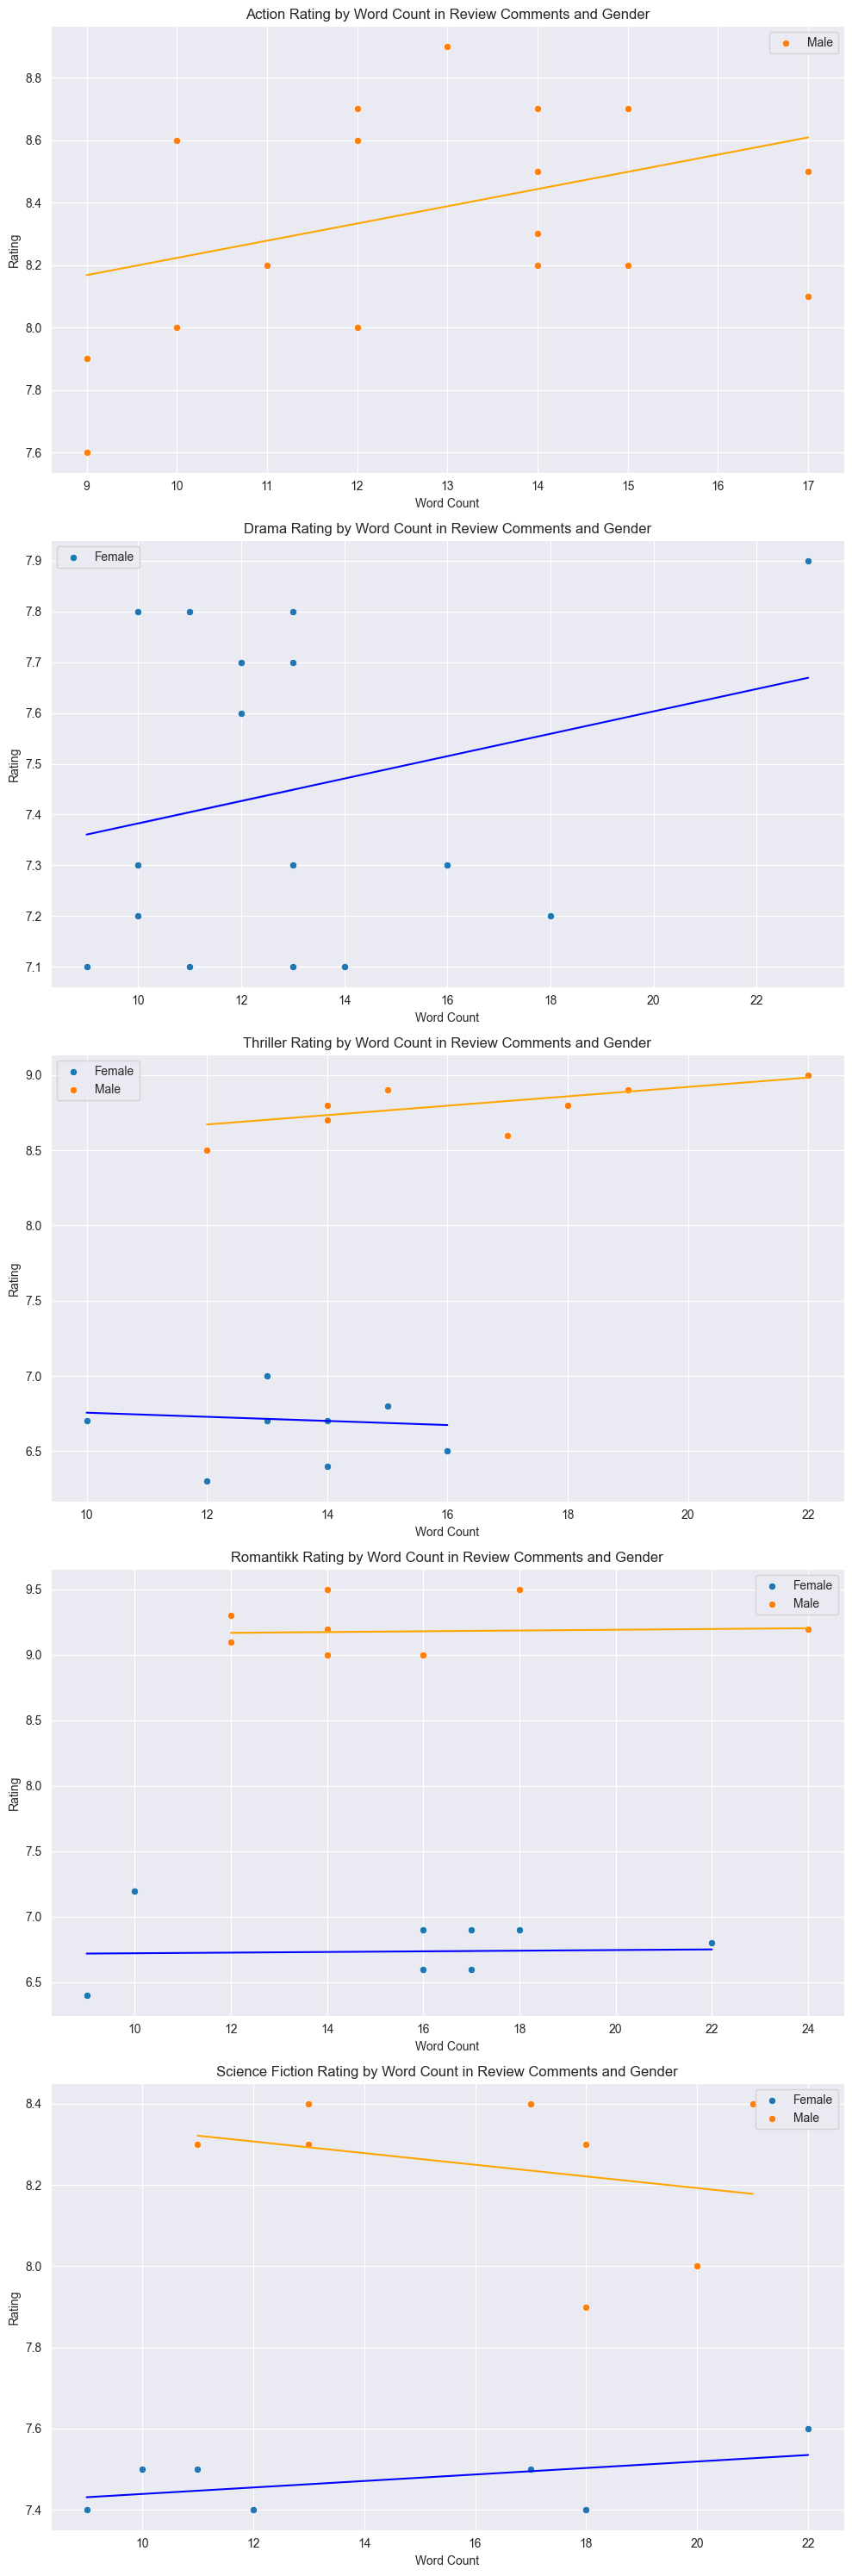

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('movie_review.csv')

# Define the genres
genres = df['genre'].unique()

# Create subplots for each genre
fig, axes = plt.subplots(nrows=len(genres), ncols=1, figsize=(10, 6 * len(genres)))

# Iterate over each genre
for i, genre in enumerate(genres):
    # Filter data for the current genre
    genre_data = df[df['genre'] == genre]
    
    # Separate ratings and review comments by gender
    female_data = genre_data[genre_data['gender'] == 'F']
    male_data = genre_data[genre_data['gender'] == 'M']
    
    # Preprocess review comments to count words
    female_data['word_count'] = female_data['review_comment'].apply(lambda x: len(x.split()))
    male_data['word_count'] = male_data['review_comment'].apply(lambda x: len(x.split()))
    
    # Plot female and male review comments
    sns.scatterplot(x='word_count', y='rating', data=female_data, ax=axes[i], label='Female')
    sns.scatterplot(x='word_count', y='rating', data=male_data, ax=axes[i], label='Male')
    
    # Fit linear regression models
    if not female_data.empty:
        reg_female = LinearRegression().fit(female_data['word_count'].values.reshape(-1, 1), female_data['rating'].values.reshape(-1, 1))
        sns.lineplot(x=female_data['word_count'], y=reg_female.predict(female_data['word_count'].values.reshape(-1, 1)).flatten(), ax=axes[i], color='blue')
    if not male_data.empty:
        reg_male = LinearRegression().fit(male_data['word_count'].values.reshape(-1, 1), male_data['rating'].values.reshape(-1, 1))
        sns.lineplot(x=male_data['word_count'], y=reg_male.predict(male_data['word_count'].values.reshape(-1, 1)).flatten(), ax=axes[i], color='orange')
    
    axes[i].set_title(f'{genre} Rating by Word Count in Review Comments and Gender')
    axes[i].set_xlabel('Word Count')
    axes[i].set_ylabel('Rating')
    axes[i].legend()

plt.tight_layout()
plt.show()    
